<a href="https://colab.research.google.com/github/hankou-code/phys/blob/main/3_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Строим графики для работы 3.5.1 Изучение плазмы газового разряда в неоне

Данные были сняты с установки:

Дата выполнения работы: 18 сентября 2021 года
Авторы работы: Ганьков Роман

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Вспомогательные функции

In [ ]:
class DataHandler:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def computation_coefficients_with_lsm(self):
        # y = mx + c -----> y = Ap
        A = np.vstack([self.x, np.ones(len(self.x))]).T
        m, c = np.linalg.lstsq(A, self.y, rcond=None)[0]
        self.m = m
        self.c = c
    
    def computation_std_and_relative_error(self):
        # y_predicted was predicted with using the least squares method
        absolute_diff_y = self.y - self.m * self.x - self.c
        # standart deviation of y
        y_std = absolute_diff_y.std(axis=0, ddof=1)
        y_mean = self.y.mean()
        # relative error in determining the value of v [in percentes]
        y_relative = y_std / y_mean * 100
        self.y_std = y_std
        self.y_relative = y_relative

    def print_lsm_data(self):
        print(f"y = {self.m:.{3}}x + {self.c:.{3}}")
        print(f"std: {self.y_std:.{3}}")
        print(f"relative error: {self.y_relative:.{3}}%")

    def computation(self):
        self.computation_coefficients_with_lsm()
        self.computation_std_and_relative_error()
        self.predict_polynomial_function()

    def return_experimental_data_for_plotting(self, fmt='b-', label_name='Origin'):
        return [self.x, self.y, self.y_std, label_name, fmt]

    def return_lsm_for_plotting(self, fmt='r'):
        y = self.m * self.x + self.c
        label_name = f"LSM predicted: [y={self.m:.{3}}*x + {self.c:.{3}}, std = {self.y_std:.{3}}, relative = {self.y_relative:.{3}}%] "
        return [self.x, y, self.y_std, label_name, fmt]

    def return_polynomial_for_plotting(self, fmt='g'):
        y = self.polynomial_function(self.x)
        label_name = f" Predicted polynom "
        # label_name = f" Polynom predicted: [{self.polynomial_function}]] "
        return [self.x, y, self.y_std, label_name, fmt]

    def return_lsm_coefs(self):
        return self.m, self.c

    def root_mean_square_error_m(self):
        # D_xx, D_yy
        covariance_xx = self.x.square.avg - self.x.avg.square
        covariance_yy = self.y.square.avg - self.y.avg.square
        sigma_m_square = (1 / self.n - 2) * (covariance_yy / covariance_xx - self.m.square)
        sigma_c_square = sigma_m_square * self.x.square.avg
        self.sigma_m = sqrt(sigma_m_square)
        self.sigma_c = sqrt(sigma_c_square)
        return self.sigma_m, self.sigma_c

    def predict_polynomial_function(self, polynomial_order=7):
        polynomial_coefs = np.polyfit(self.x, self.y, polynomial_order)
        polynomial_function = np.poly1d(polynomial_coefs)
        self.polynomial_function = polynomial_function        



class DataVisualizer:
    def __init__(self, name_shedule="Test", images_dir='/content/gdrive/My Drive/phys_labs/', xlabel="Test", ylabel="Test"):
        self.name_shedule = name_shedule
        self.images_dir = images_dir
        self.num_lines = 0
        self.xlabel = xlabel
        self.ylabel = ylabel
        
    def add_line_to_graph(self, x, y, name, fmt, lsm_line = False, polynom_line = False):
        handler = DataHandler(x, y)
        handler.computation()

        curve = handler.return_experimental_data_for_plotting(label_name=name, fmt=fmt)
        lsm_curve = handler.return_lsm_for_plotting()
        polynom_curve = handler.return_polynomial_for_plotting()

        prepared_data = [curve]

        if (lsm_line):
            prepared_data = np.concatenate(([curve], [lsm_curve]), axis=0)

        if (polynom_line):
            prepared_data = np.concatenate(([curve], [polynom_curve]), axis=0)

        if self.num_lines == 0:
            self.data = prepared_data
        elif self.num_lines == 1:
            self.data = np.concatenate((self.data, prepared_data), axis=0)
        else:
            self.data = np.concatenate((self.data, prepared_data), axis=0)

        self.num_lines += 1
        
    # TODO: добавить возможность печати линии отдельно от графика
    def print_theoretically_calculated_dependence(self):
        pass

    def plot_lines(self):
        plt.figure(figsize=(15, 9))
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        for x, y, y_std, label_name, fmt in self.data:
            self.plot_line(x, y, y_std, label_name, fmt)
        self.save_plot()

    def plot_line(self, x, y, y_std, label_name, fmt='b', with_error_bar = False):
        plt.plot(x, y, fmt, label=label_name, markersize=2)
        if (with_error_bar):
            plt.errorbar(x, y, yerr=y_std, fmt=".")
        plt.legend()

    def save_plot(self):
        # saving image at google drive
        plt.savefig(f"{self.images_dir}/{self.name_shedule}.png", dpi = 300)

    # TODO: настроить отцентровку осей
    def axes_centralization(self):
        pass


In [ ]:
I_division_up = np.array([14, 19, 29, 35, 42, 50, 58, 65, 74, 78, 85, 89, 94, 105, 112, 116, 124])

I_up = I_division_up * 0.04 # мА
U_up = np.array([34.01, 33.06, 32.11, 31.75, 30.82, 29.80, 29.00, 28.34, 27.80, 27.64, 27.36, 27.26, 27.22, 27.22, 27.25, 27.30, 27.30])

I_division_down = np.array([120, 115, 111, 104, 99, 95, 87, 84, 77, 74, 70, 64, 60, 54, 50, 45, 40])

I_down = I_division_down * 0.04 # мА
U_down = np.array([27.21, 27.26, 27.23, 27.17, 27.15, 27.17, 27.23, 27.30, 27.55, 27.64, 27.85, 28.30, 28.70, 29.31, 29.51, 30.23, 31.30])

x_up = U_up
y_up = I_up

x_down = U_down
y_down = I_down

xlabel = "I, мА"
ylabel = "U, В"

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


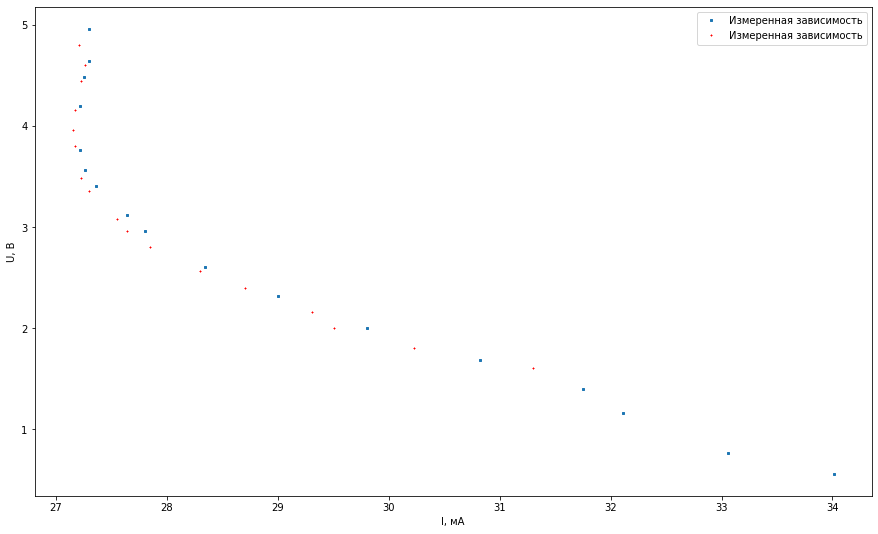

In [ ]:
dh = DataVisualizer(name_shedule="Зажигание заряда", xlabel=xlabel, ylabel=ylabel)
dh.add_line_to_graph(x=x_up, y=y_up, name="Измеренная зависимость", fmt='s')
dh.add_line_to_graph(x_down, y_down, name="Измеренная зависимость", fmt='r+')

dh.plot_lines()

In [ ]:
# TODO: заменить ручную центровку осей
# dh.axes_centralization()
delta_microamperas = 1.8

# ток разряда 5 мА
U_1 = np.array([25, 22, 19, 16, 13, 10, 8, 6, 4 , 2, 1.72, -1.72, -2, -4, -6, -8, -10, -13, -16, -19, -22, -25]) # Вольты
I_1 = np.array([89.9, 91.4, 90.15, 87.06, 80.72, 69.5, 57.5, 42.9, 24.23, 3.20, 0.00, -28.7, -32.60, -51.67, -68.40, -80.87, -90.90, -100.68, -106.50, -109.72, -110.17, -110.27]) # Мк Амперы
x_1 = U_1 - delta_microamperas
y_1 = I_1

x_1_first_shortened = x_1[0:4]
y_1_first_shortened = y_1[0:4]

x_1_last_shortened = x_1[-4:-1]
y_1_last_shortened = y_1[-4:-1]

num_1_points = x_1.size
center = int(num_1_points / 2) - 1

x_1_centered = x_1[center-2:center+2]
y_1_centered = y_1[center-2:center+2]

# ток разряда 3 мА
U_2 = np.array([25, 22, 19, 16, 13, 10, 8, 6, 4 , 2, 1.72, 0, -2, -4, -6, -8, -10, -13, -16, -19, -22, -25]) # Вольты
I_2 = np.array([52.81, 51.01, 49.17, 47.40, 44.78, 39.79, 33.96, 25.67, 14.84, 1.96, 0, -9.86, -23.18, -34.87, -44.25, -50.91, -56.14, -59.15, -63.08, -65.19, -67.34, -69.44]) # Мк Амперы

x_2 = U_2 - delta_microamperas
y_2 = I_2

x_2_first_shortened = x_2[0:4]
y_2_first_shortened = y_2[0:4]

x_2_last_shortened = x_2[-4:-1]
y_2_last_shortened = y_2[-4:-1]

num_2_points = x_2.size
center = int(num_2_points / 2) - 1

x_2_centered = x_2[center-2:center+2]
y_2_centered = y_2[center-2:center+2]


# ток разряда 1.5мА
U_3 = np.array([25, 22, 19, 16, 13, 10, 8, 6, 4 , 2, 1.7, 0, -2, -4, -6, -8, -10, -13, -16, -19, -22, -25]) # Вольты
I_3 = np.array([25.56, 24.73, 23.92, 23.10, 22.05, 19.73, 17.07, 12.80, 7.40, 0.53, 0, -6.44, -13.72, -19.74, -24.30, -27.55, -29.82, -31.83, -33.24, -34.57, -35.81, -37.19]) # Мк Амперы

x_3 = U_3 - delta_microamperas
y_3 = I_3

x_3_first_shortened = x_3[0:4]
y_3_first_shortened = y_3[0:4]

x_3_last_shortened = x_3[-4:-1]
y_3_last_shortened = y_3[-4:-1]

num_3_points = x_3.size
center = int(num_3_points / 2) - 1

x_3_centered = x_3[center-2:center+2]
y_3_centered = y_3[center-2:center+2]

# общие данные
ylabel = "I, мкА"
xlabel = "U, В"

In [ ]:
print("ток разряда 5 мА")

dh = DataHandler(x_1_first_shortened, y_1_first_shortened)
dh.computation()
dh.print_lsm_data()

dh = DataHandler(x_1_last_shortened, y_1_last_shortened)
dh.computation()
dh.print_lsm_data()

print("ток разряда 3 мА")
dh = DataHandler(x_2_first_shortened, y_2_first_shortened)
dh.computation()
dh.print_lsm_data()

dh = DataHandler(x_2_last_shortened, y_2_last_shortened)
dh.computation()
dh.print_lsm_data()

print("ток разряда 1.5 мА")
dh = DataHandler(x_3_first_shortened, y_3_first_shortened)
dh.computation()
dh.print_lsm_data()

dh = DataHandler(x_3_last_shortened, y_3_last_shortened)
dh.computation()
dh.print_lsm_data()


ток разряда 5 мА
y = 0.326x + 83.0
std: 1.33
relative error: 1.48%
y = 0.612x + -97.2
std: 0.8
relative error: -0.735%
ток разряда 3 мА
y = 0.602x + 37.7
std: 0.0166
relative error: 0.0332%
y = 0.71x + -51.7
std: 0.0115
relative error: -0.0177%
ток разряда 1.5 мА
y = 0.273x + 18.7
std: 0.00483
relative error: 0.0199%
y = 0.428x + -26.4
std: 0.026
relative error: -0.0752%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_la

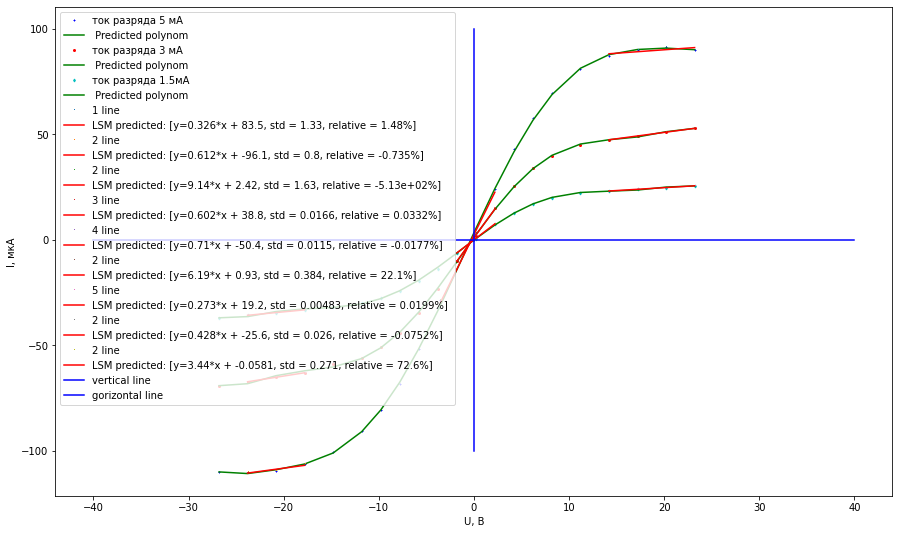

In [ ]:
dh = DataVisualizer(name_shedule="Зондовые характеристики", xlabel=xlabel, ylabel=ylabel)

# строим основные кривые
dh.add_line_to_graph(x_1, y_1, polynom_line=True, name="ток разряда 5 мА", fmt='b+')
dh.add_line_to_graph(x_2, y_2, polynom_line=True, name="ток разряда 3 мА", fmt='ro')
dh.add_line_to_graph(x_3, y_3, polynom_line=True, name="ток разряда 1.5мА", fmt='cd')

# определеяем ток насыщения при токе разряда 5 мА
dh.add_line_to_graph(x_1_first_shortened, y_1_first_shortened, name="1 line", fmt=',', lsm_line=True)
dh.add_line_to_graph(x_1_last_shortened, y_1_last_shortened, name="2 line", fmt=',', lsm_line=True)
dh.add_line_to_graph(x_1_centered, y_1_centered, name="2 line", fmt=',', lsm_line=True)

# определеяем ток насыщения при токе разряда 3 мА
dh.add_line_to_graph(x_2_first_shortened, y_2_first_shortened, name="3 line", fmt=',', lsm_line=True)
dh.add_line_to_graph(x_2_last_shortened, y_2_last_shortened, name="4 line", fmt=',', lsm_line=True)
dh.add_line_to_graph(x_2_centered, y_2_centered, name="2 line", fmt=',', lsm_line=True)

# # определеяем ток насыщения при токе разряда 1.5 мА
dh.add_line_to_graph(x_3_first_shortened, y_3_first_shortened, name="5 line", fmt=',', lsm_line=True)
dh.add_line_to_graph(x_3_last_shortened, y_3_last_shortened, name="2 line", fmt=',', lsm_line=True)
dh.add_line_to_graph(x_3_centered, y_3_centered, name="2 line", fmt=',', lsm_line=True)

# добавляем оси
dh.add_line_to_graph(np.array([0.01, 0.01, 0.01, 0.01]), np.array([-100, 1., 10., 100]), name="vertical line", fmt='b')
dh.add_line_to_graph(np.array([-40, 1., 10., 40]), np.array([0.01, 0.01, 0.01, 0.01]), name="gorizontal line", fmt='b')
dh.plot_lines()